##  In this project, we are going to explore the car accident dataset of the US. The accident data are          collected from February 2016 to Dec 2020, there are about 3 million countrywide accident records. We are              going to analyse the data to explore hotspot locations of the Accidents, look for information about time of day of the frequency higher and the impact of environmental stimuli on accident occurrence.




# 1. Import Data and Libraries

> ### First of all, we might import necessary libraries for our analysis and upload the file contain the car accident dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_us=pd.read_csv('US_Accidents_Dec20_Updated.csv')

> ### Before cleaning data, we need display the dataset to get basic information

In [4]:
display(df_us.head(10))

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,35.348240,-80.847221,0.000,Three lanes blocked due to accident on I-77 No...,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,35.863490,-86.831680,35.849480,-86.832530,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,34.420220,-118.581900,0.460,At Magic Mountain Pky - Accident. Hard shoulde...,...,False,False,False,False,False,False,Day,Day,Day,Day


# 2. Data Preparation



> ### After that, we get to exploring the data, first and foremost we should prepare the data for the analysis. We'll first do data cleaning. we'll check for the null values and remove all the columns with a lot of null values. Also we'll imput appropriate values for the required columns for our analysis then We'll do memory optimzation since our data is too large.

In [5]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df_us.shape

(2906610, 47)

> There are 2906610 rows and 47 columns 

# 3. Data Cleaning



> ###  We'll first see how many null values are there in the dataset. We'll drop the columns containing large number of null values since they won't be much useful. We'll also get rid of few of the columns which aren't too important.

In [7]:
df_us.isna().sum().sort_values(ascending = False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

> There are a lot of missing values including Number has 1891672 null values, Precipitation(in) has 1301326 null values, Wind_Chill(F) has 1183859 null values ......

In [8]:
df_us.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


> We look at the parameter that understanding all the information about count, mean, std, 25-50-75 percentile of each column, min, max

>For example about Severity: count=2.906610e+06	convert numeric count=2906610

In [9]:
df_us.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

> ### Some columns have definitely way more null columns, They should be discarded completely. But first let's visualize the null values of the data for better understanding

In [10]:
import seaborn as sns

In [11]:
null_values = df_us.isna().sum().reset_index()
null_values.columns = ["Columns", "Null_count"]
null_values["% Null_values"] = (null_values["Null_count"]*100)/len(df_us)
null_values.sort_values(by = "Null_count",ascending = False, inplace = True)
Missing_values = null_values[null_values["Null_count"] != 0]
Missing_values.head()

,Columns,Null_count,% Null_values
10,Number,1891672,65.081728
28,Precipitation(in),1301326,44.771263
22,Wind_Chill(F),1183859,40.729888
27,Wind_Speed(mph),307163,10.567740
6,End_Lat,282821,9.730270


<AxesSubplot:title={'center':'Percentage Of Null Values'}, xlabel='Columns', ylabel='% Null_values'>

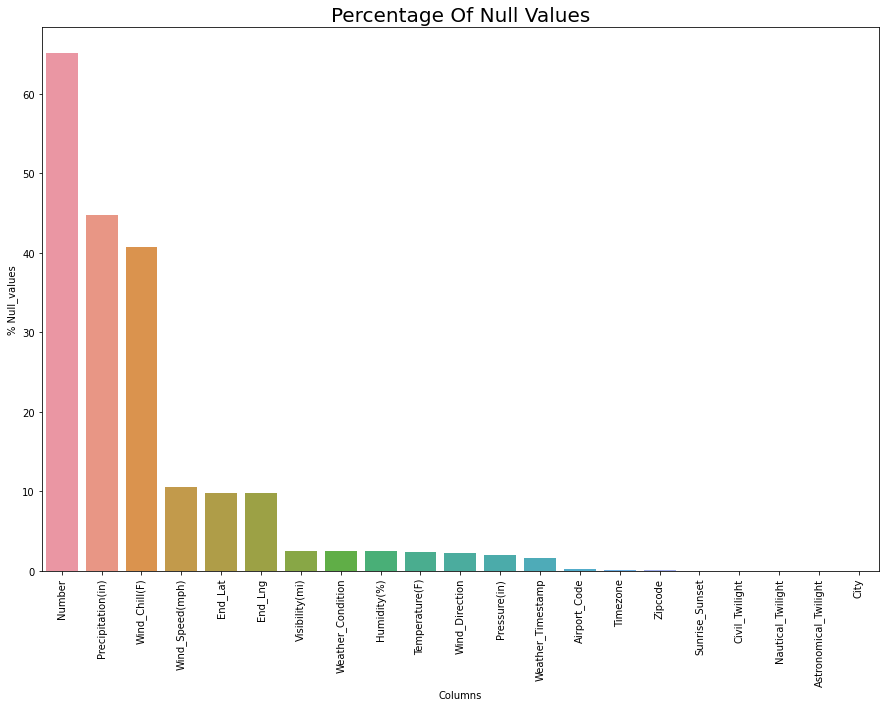

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
plt.title("Percentage Of Null Values",fontsize= 20)
sns.barplot(x = "Columns", y = "% Null_values", data = Missing_values )

> ### The top 3 columns with most null values have more than 40% of null values so they're useless. There's also a big jump from 7th to 6th column, since the top 6 columns containing most null values are not that important for our analysis, We'll drop them completely

In [13]:
df_us.drop(axis = 1, columns = ['Number','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','End_Lat','End_Lng'], inplace = True)

In [14]:
df_us.drop(axis=1, columns = ['Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'] ,inplace = True)


In [15]:
df_us.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Country', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

> ### Now that we've taken care of all the columns with null values, We'll now fill the remaining coulmns with appropriate values. Fill NA/NaN values by Median formula deal with numeric ,Mode formula deal with boolean and value "None" deal with other values

In [16]:
df_us["Temperature(F)"].fillna(df_us["Temperature(F)"].median(), inplace = True)
df_us["Humidity(%)"].fillna(df_us["Humidity(%)"].median(), inplace = True)
df_us["Visibility(mi)"].fillna(df_us["Visibility(mi)"].median(), inplace = True)

In [17]:
df_us["Weather_Condition"].fillna(df_us["Weather_Condition"].mode()[0], inplace = True)
df_us["Sunrise_Sunset"].fillna(df_us["Sunrise_Sunset"].mode()[0], inplace = True)

In [18]:
df_us["City"].fillna(value = "None", inplace = True)

In [19]:
df_us.head(15)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,...,False,False,False,False,False,False,False,False,False,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,...,False,False,False,False,False,False,False,False,False,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,...,False,False,False,False,False,False,False,False,False,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,...,False,False,False,False,False,False,False,True,False,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,...,True,False,False,False,False,False,False,True,False,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,0.000,Three lanes blocked due to accident on I-77 No...,W W.T. Harris Blvd,R,...,False,False,False,False,False,False,False,False,False,Day
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,I-70 E,R,...,False,False,False,False,False,False,False,False,False,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,CA-60 W,R,...,False,False,False,False,False,False,False,False,False,Night
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,35.863490,-86.831680,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. ...,Old Peytonsville Rd,R,...,False,False,False,False,False,False,False,False,False,Day
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,0.460,At Magic Mountain Pky - Accident. Hard shoulde...,Golden State Fwy S,R,...,False,False,False,False,False,False,False,False,False,Day


In [20]:
df_us[['Temperature(F)','Humidity(%)','Visibility(mi)','Weather_Condition','Sunrise_Sunset']].iloc[148:156]

,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset
148,88.0,61.0,10.0,Mostly Cloudy,Day
149,61.0,81.0,10.0,Overcast,Night
150,63.0,68.0,10.0,Fair,Day
151,58.0,53.0,10.0,Fair,Night
152,55.4,63.0,10.0,Clear,Night
153,45.0,53.0,10.0,Fair,Day
154,45.0,66.0,10.0,Fair,Night
155,61.0,64.0,10.0,Mostly Cloudy,Day


> ### We've a clean data for our analysis. Now let's do some memory optimization¶

In [21]:
df_us.isna().sum().sort_values(ascending=False)

Sunrise_Sunset       0
Turning_Loop         0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
ID                   0
dtype: int64

In [22]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   Distance(mi)       float64
 7   Description        object 
 8   Street             object 
 9   Side               object 
 10  City               object 
 11  County             object 
 12  State              object 
 13  Country            object 
 14  Temperature(F)     float64
 15  Humidity(%)        float64
 16  Visibility(mi)     float64
 17  Weather_Condition  object 
 18  Amenity            bool   
 19  Bump               bool   
 20  Crossing           bool   
 21  Give_Way           bool   
 22  Junction           bool   
 23  No_Exit            bool   
 24  Railway            bool   
 25  Roundabout        

# 4. Memory Optimization



### There are lots of column with a string datatype which could be converted into categorial datatype columns for performance improvement. Let’s take a look at which columns might be good candidates for a categorical datatype.

In [23]:
for col in df_us.columns:
    if df_us[col].nunique() < 2100 and df_us[col].nunique() > 10 and df_us[col].dtype== "object": 
        df_us[col] = df_us[col].astype("category")

In [24]:
df_us["Country"] = df_us["Country"].astype("category")

In [25]:
df_us["Side"] = df_us["Side"].astype("category")

In [26]:
df_us[["Start_Time","End_Time"]] = df_us[["Start_Time","End_Time"]].astype("datetime64[ns]")

> Now let's convert the datatypes of columns Start_Time and End_Time as these should be in datetime datatypes for our analysis

In [27]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   Distance(mi)       float64       
 7   Description        object        
 8   Street             object        
 9   Side               category      
 10  City               object        
 11  County             category      
 12  State              category      
 13  Country            category      
 14  Temperature(F)     float64       
 15  Humidity(%)        float64       
 16  Visibility(mi)     float64       
 17  Weather_Condition  category      
 18  Amenity            bool          
 19  Bump               bool          
 20  Crossing           bool 

> We've reduced the memory usage by approximately 55% i.e 790 MB to 366.0 MB after removing all the null values and converting few columns to categorical datatype.

> We're all done with the data preparation. Now let's explore our data.

# 5. Exploring Data



### In this, We'll analyse each column of our dataset excluding some which don't impact or have any meaningful insights whatsoever. There are many columns worth exploring like State, City, Street, County, Start_Time, Temperature(F), Weather_Condition, Visibility(mi). We'll gain many insights and will try to answer a lot of questions about the dataset.

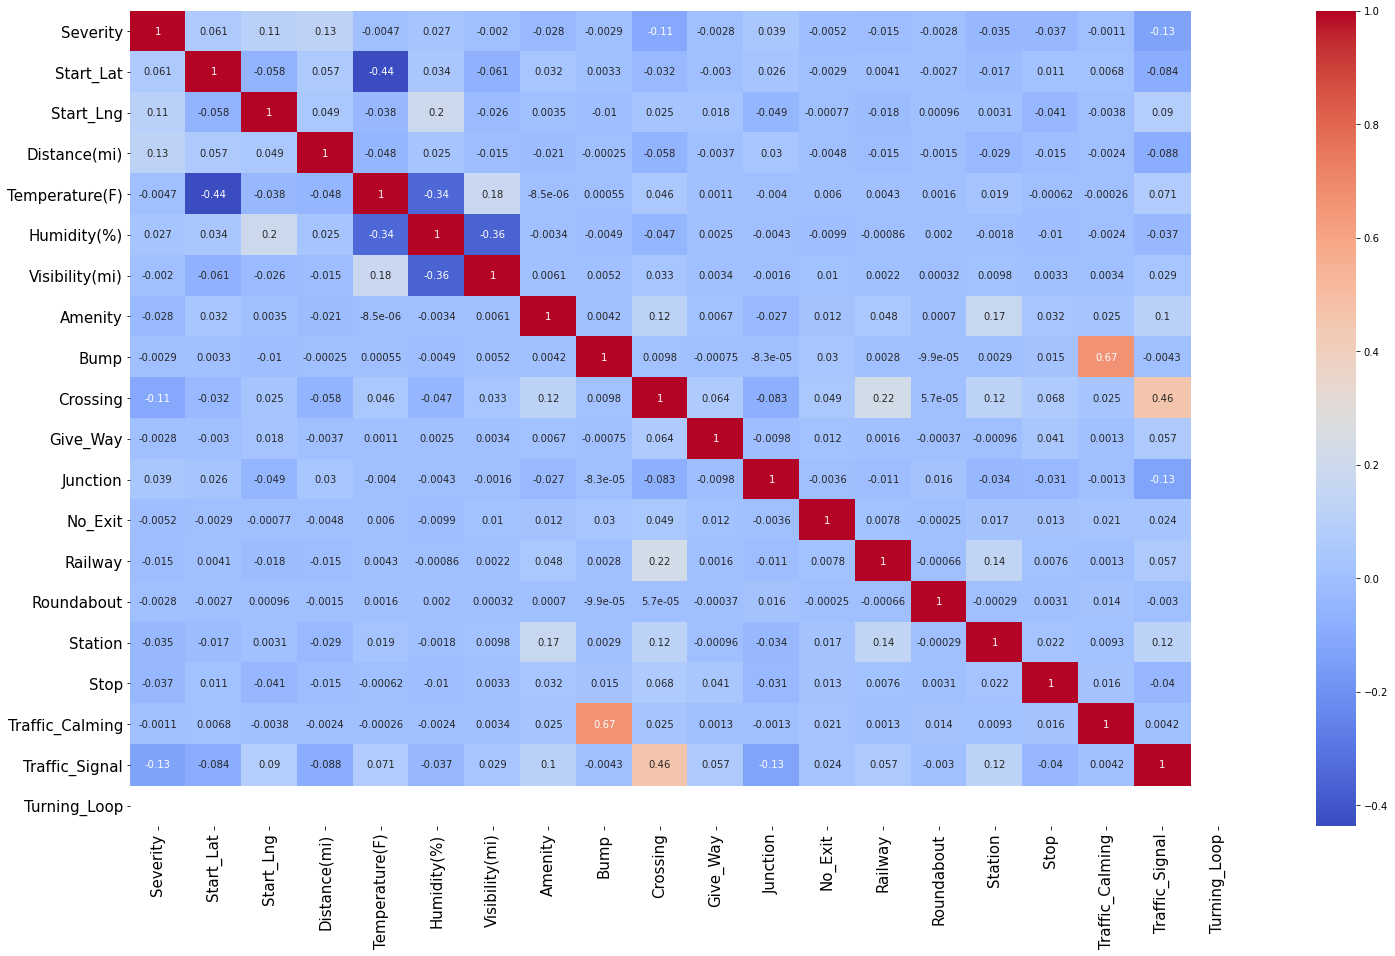

In [28]:
plt.figure(figsize=(25,15))
Var_Corr = df_us.corr()
sns.heatmap(Var_Corr,cmap="coolwarm", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## a/ State
> ### The US have 50 states in the total. Let's plot a bar plot to understand which state has the most accidents records

Text(0.5, 1.0, 'Accident of USA Statistics')

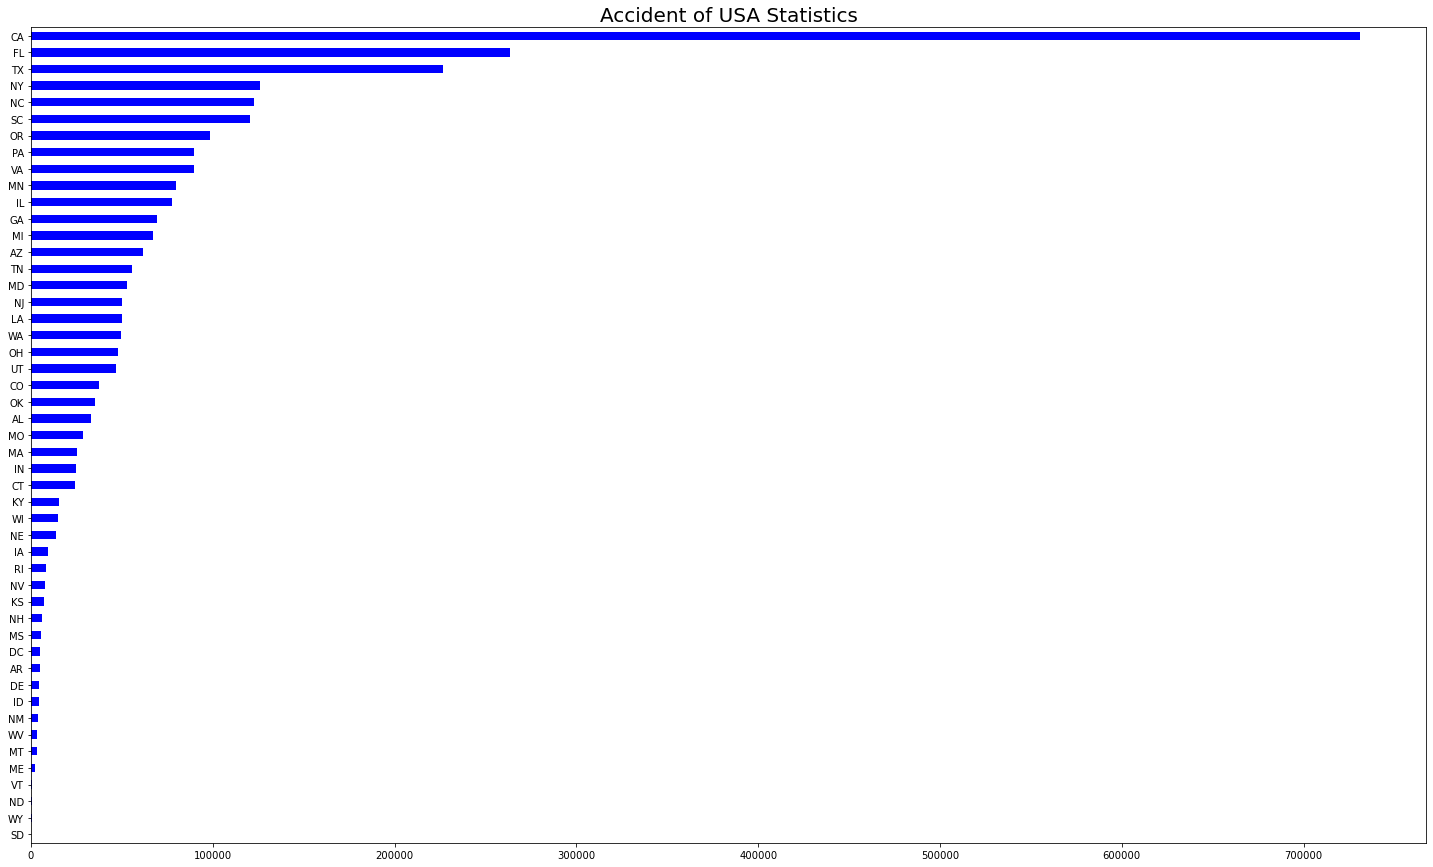

In [29]:
plt.figure(figsize=(25,15))
df_us["State"].value_counts(ascending=True).plot(kind="barh",color="b")
plt.title("Accident of USA Statistics",fontsize=20)

Text(0.5, 1.0, 'Accident of USA Statistics')

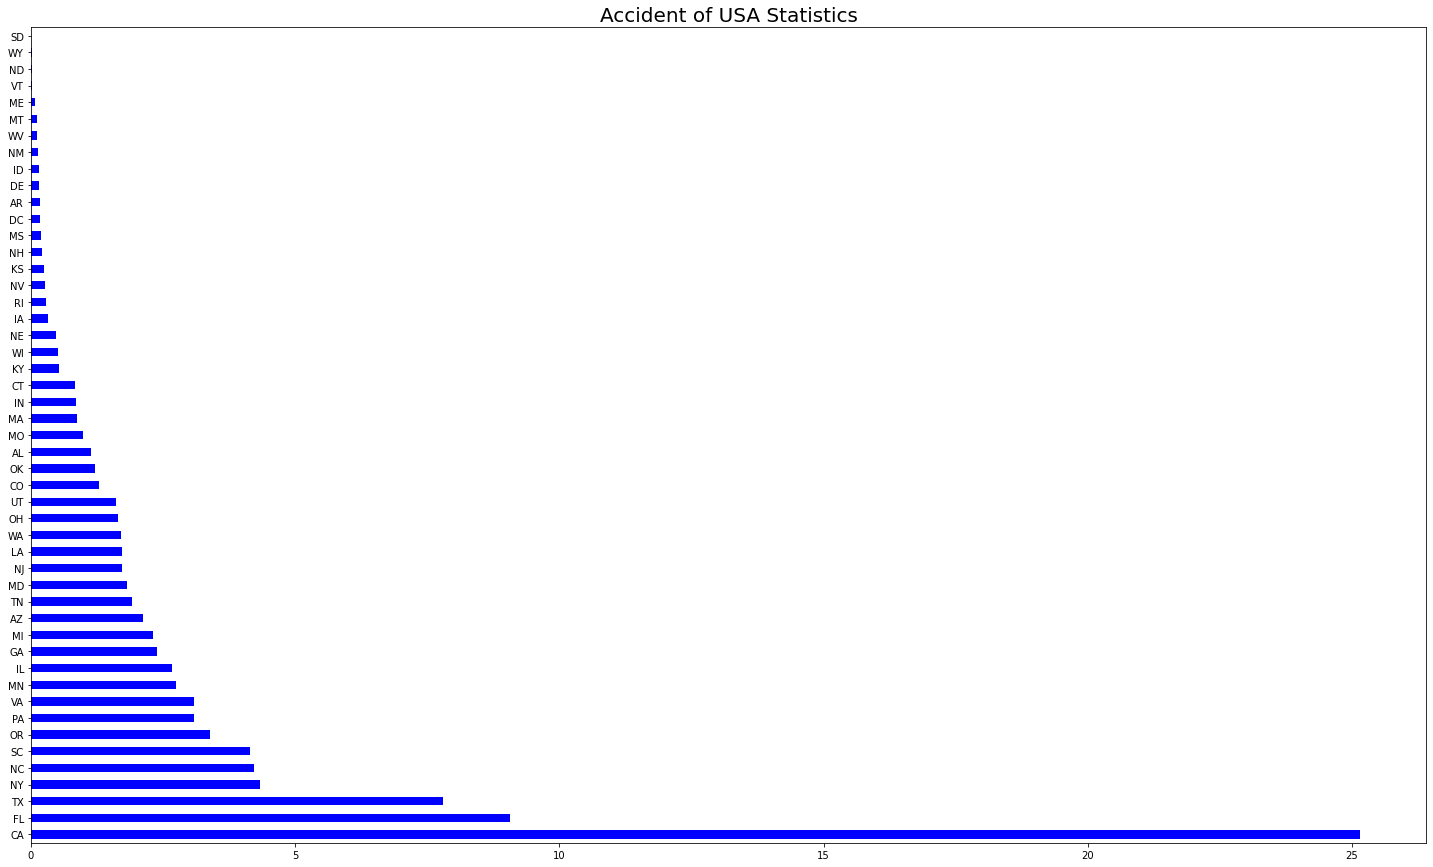

In [30]:
plt.figure(figsize=(25,15))
(df_us["State"].value_counts(ascending=False)*100/len(df_us)).plot(kind="barh",color="b")
plt.title("Accident of USA Statistics",fontsize=20)

> We can clearly see that California (CA) has the highest number of Accidents by a large margine with Florida (FL) which has the second most accident records. Lets plot a percentage graph for a clearer picture

## b/ cities

In [75]:
city=df_us["City"].value_counts(ascending=False).reset_index()
city.columns=["City","Number_of_Accidents"]
city["% Number_of_Accidents"]=(city["Number_of_Accidents"]*100/len(df_us))
city.sort_values(by=["Number_of_Accidents"],ascending=False,inplace=True)
city_accidents=city.head(50)
city_accidents.head(50)
# df_us["Number_of_Accidents"]

,City,Number_of_Accidents,% Number_of_Accidents
0,Los Angeles,68411,2.353635
1,Houston,68265,2.348612
2,Charlotte,56176,1.932698
3,Miami,49965,1.719013
4,Dallas,48525,1.669471
5,Austin,38808,1.335164
6,Raleigh,31355,1.078748
7,Atlanta,29244,1.006121
8,Sacramento,28984,0.997175
9,Orlando,28092,0.966487


<AxesSubplot:title={'center':'Accident by Cities (Top 50)'}, xlabel='Number_of_Accidents', ylabel='City'>

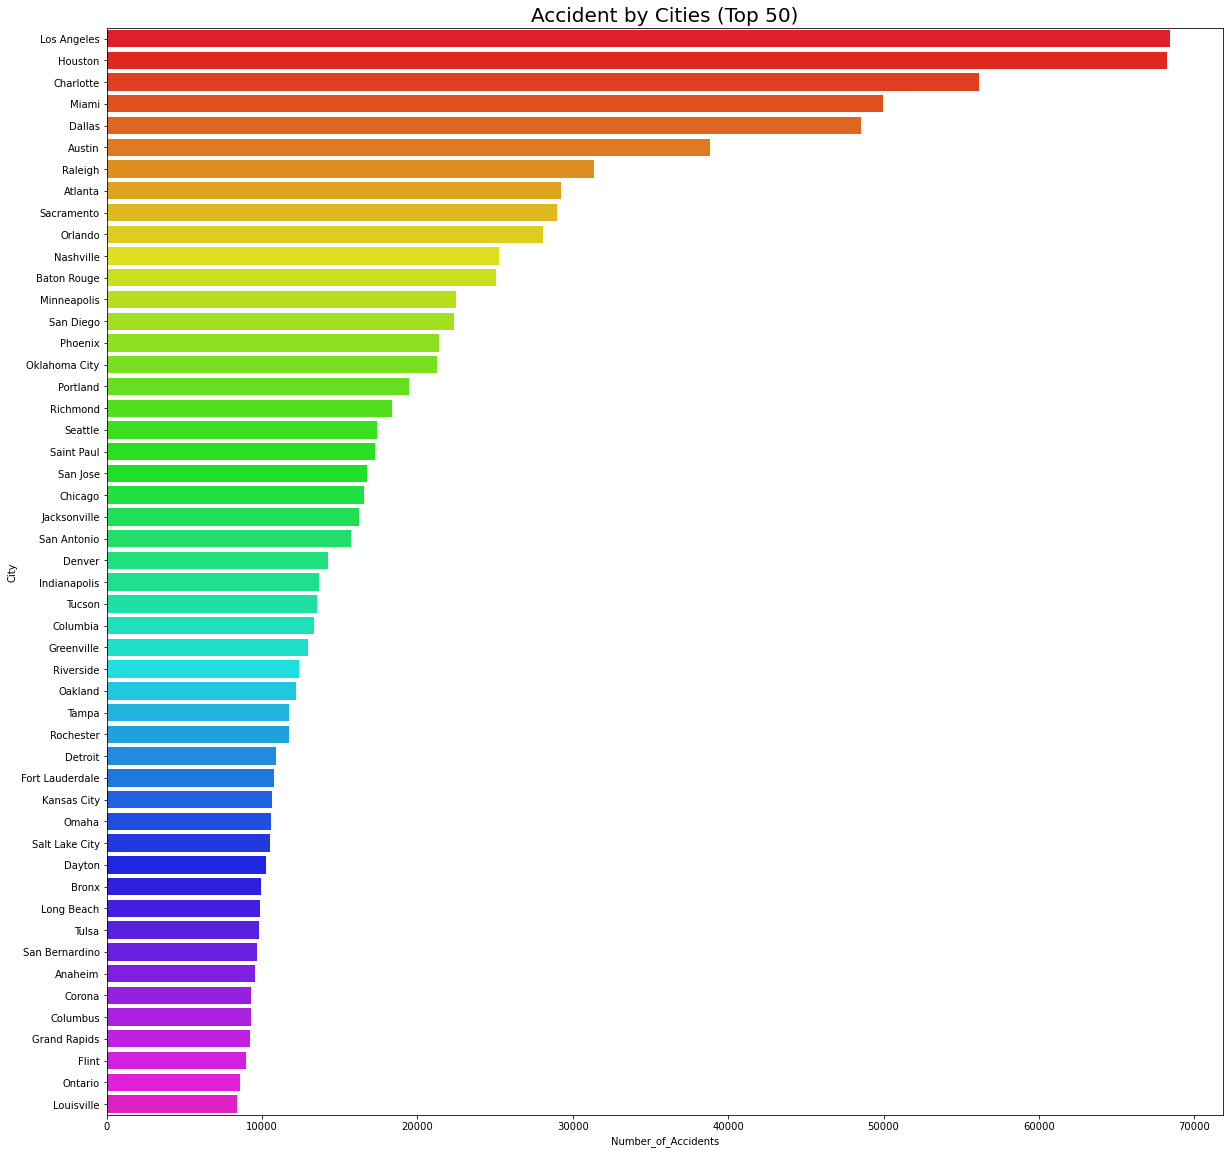

In [76]:
plt.figure(figsize=(20,20))
plt.title("Accident by Cities (Top 50)",fontsize= 20)
sns.barplot( x = "Number_of_Accidents",y = "City", data = city_accidents,palette="gist_rainbow" )

In [33]:
print("Top 10 countries number of accident : ",city["% Number_of_Accidents"].head(10).sum())
print("Top 20 countries number of accident : ",city["% Number_of_Accidents"].head(20).sum())
print("Top 100 countries number of accident : ",city["% Number_of_Accidents"].head(100).sum())

Top 10 countries number of accident :  15.407123762733907
Top 20 countries number of accident :  22.64036110795738
Top 100 countries number of accident :  44.266310237699585


> Los Angeles has the highest number of accidents with houston being second with almost similar number of accidents. Top 10 cities account for the most of the accidents.

> We have 11790 cities. Of that Top 1000 cities account for 81% of the Accidents, Top 100 cities account for 45% of the Accidents and Top 10 cities account for 16% of the Accidents

## c/ Street

In [77]:
streets = df_us["Street"].value_counts(ascending = False).reset_index()
streets.columns = ["Street", "Number_of_Accidents"]
streets["% of_Accidents"] =(streets["Number_of_Accidents"]*100)/len(df_us)
streets.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
streets_accidents = streets.head(50)
streets_accidents.head(50)

,Street,Number_of_Accidents,% of_Accidents
0,I-5 N,37554,1.292021
1,I-95 N,34896,1.200574
2,I-95 S,30771,1.058656
3,I-5 S,24454,0.841324
4,I-10 E,24021,0.826427
5,I-10 W,23281,0.800967
6,I-80 W,17946,0.617420
7,I-80 E,16572,0.570149
8,I-405 N,15998,0.550401
9,I-75 N,13634,0.469069


<AxesSubplot:title={'center':'Accident by Streets (Top 10)'}, xlabel='Number_of_Accidents', ylabel='Street'>

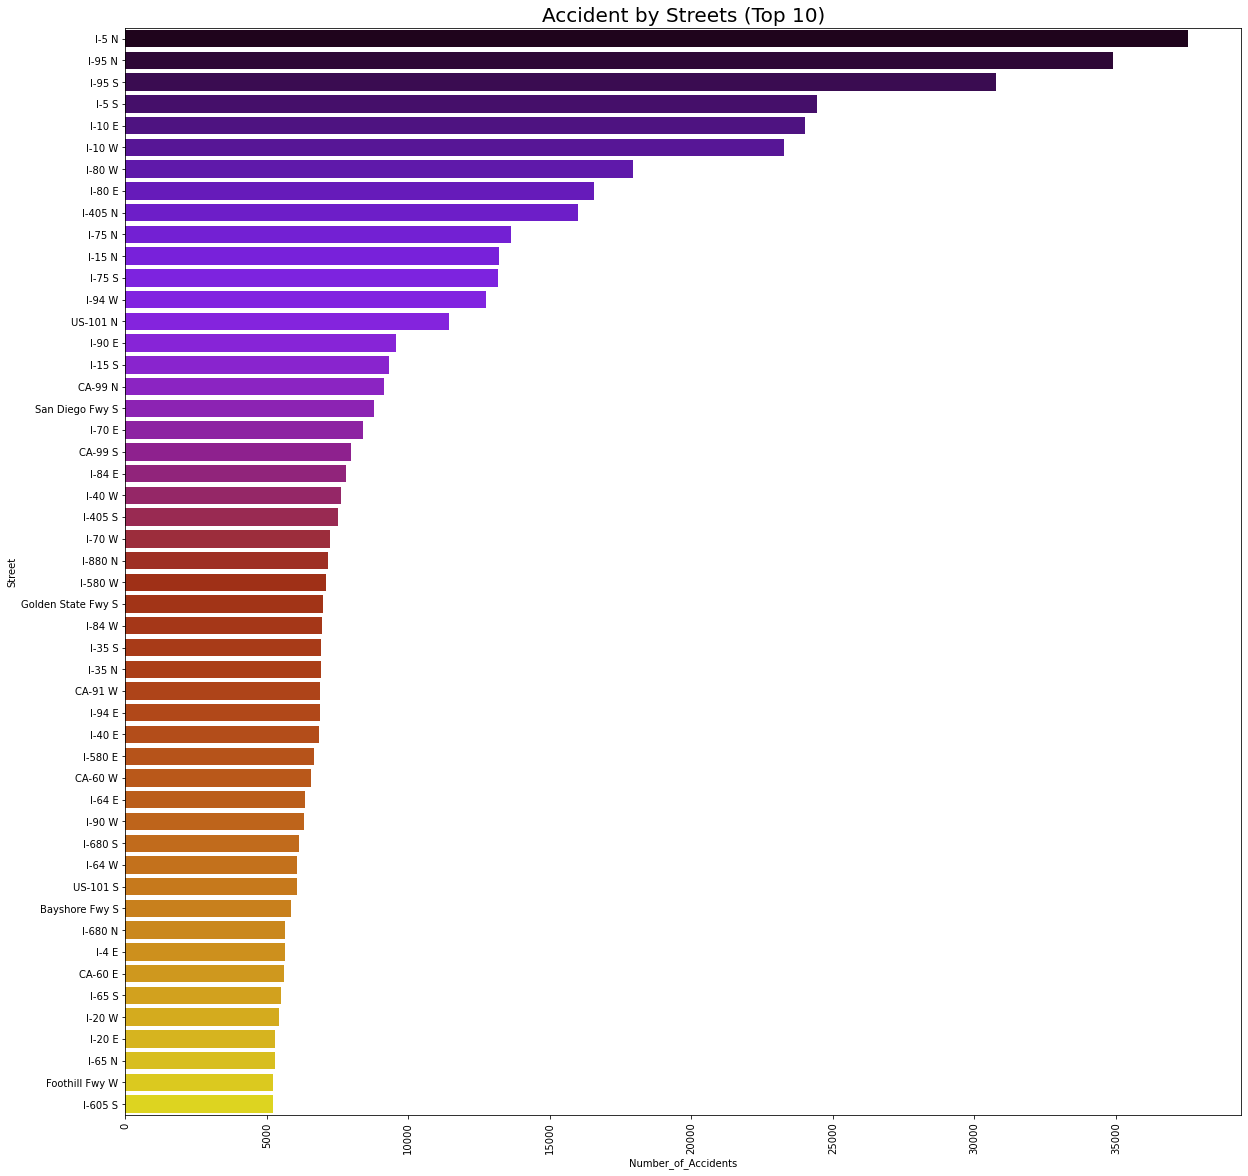

In [78]:
plt.figure(figsize=(20,20))
plt.xticks(rotation = 90)
plt.title("Accident by Streets (Top 10)",fontsize= 20)
sns.barplot(y = "Street", x = "Number_of_Accidents", data = streets_accidents,palette="gnuplot")

In [36]:
print("Top 10 streets number of accident : ",streets["% of_Accidents"].head(10).sum())
print("Top 100 streets number of accident : ",streets["% of_Accidents"].head(100).sum())
print("Top 1000 streets number of accident : ",streets["% of_Accidents"].head(1000).sum())


Top 10 streets number of accident :  8.22700671916769
Top 100 streets number of accident :  24.8816318666763
Top 1000 streets number of accident :  48.48648425485359


> I-5N had the most number of accidents, following that I-95N, I-95S. Steets follow the same trend as cities with top streets having the most number of accidents

> We have 175527 Streets. Of that Top 10000 Streets account for 77% of the Accidents, Top 1000 Streets account for 49% of the Accidents and Top 100 Streets account for 25% of the Accidents.

## d/ Year

In [37]:
df_us["Year"] = df_us["Start_Time"].dt.year

Text(0.5, 1.0, 'Yearly Accidents Trend')

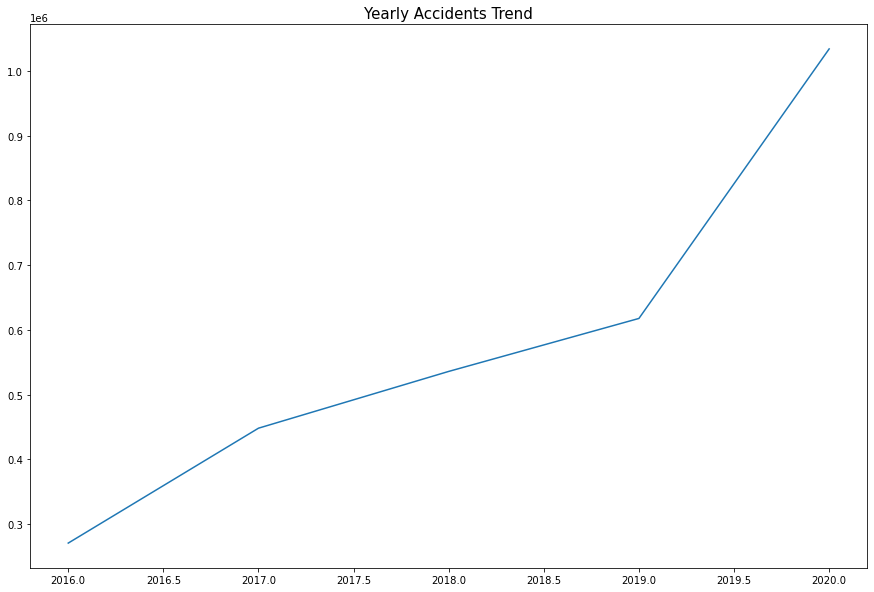

In [38]:
plt.figure(figsize = (15,10))
df_us["Start_Time"].dt.year.value_counts().plot(kind = "line")
plt.title("Yearly Accidents Trend", fontsize = 15)

> There's an increasing trend in 2020. The accidents are growing rapidly in numbers

Text(0.5, 1.0, 'Percentage of yearly Accidents')

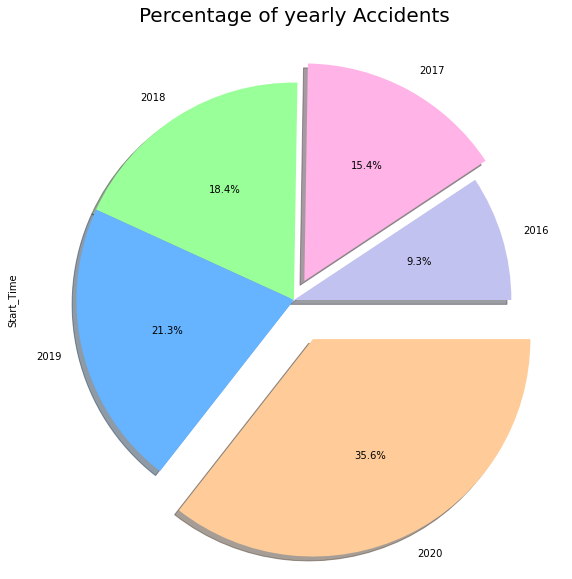

In [39]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0.2)
colors = ['#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff', '#ffcc99']
(df_us["Start_Time"].dt.year.value_counts(ascending = True)*100/len(df_us)).plot(kind = "pie", autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)
plt.title("Percentage of yearly Accidents", fontsize = 20)

> Out of all the accident records 35.6% of accidents have happened in 2020. Accidents are increasing at an alarming rate every year.

Text(0.5, 1.0, 'Percentage of yearly Accidents by States')

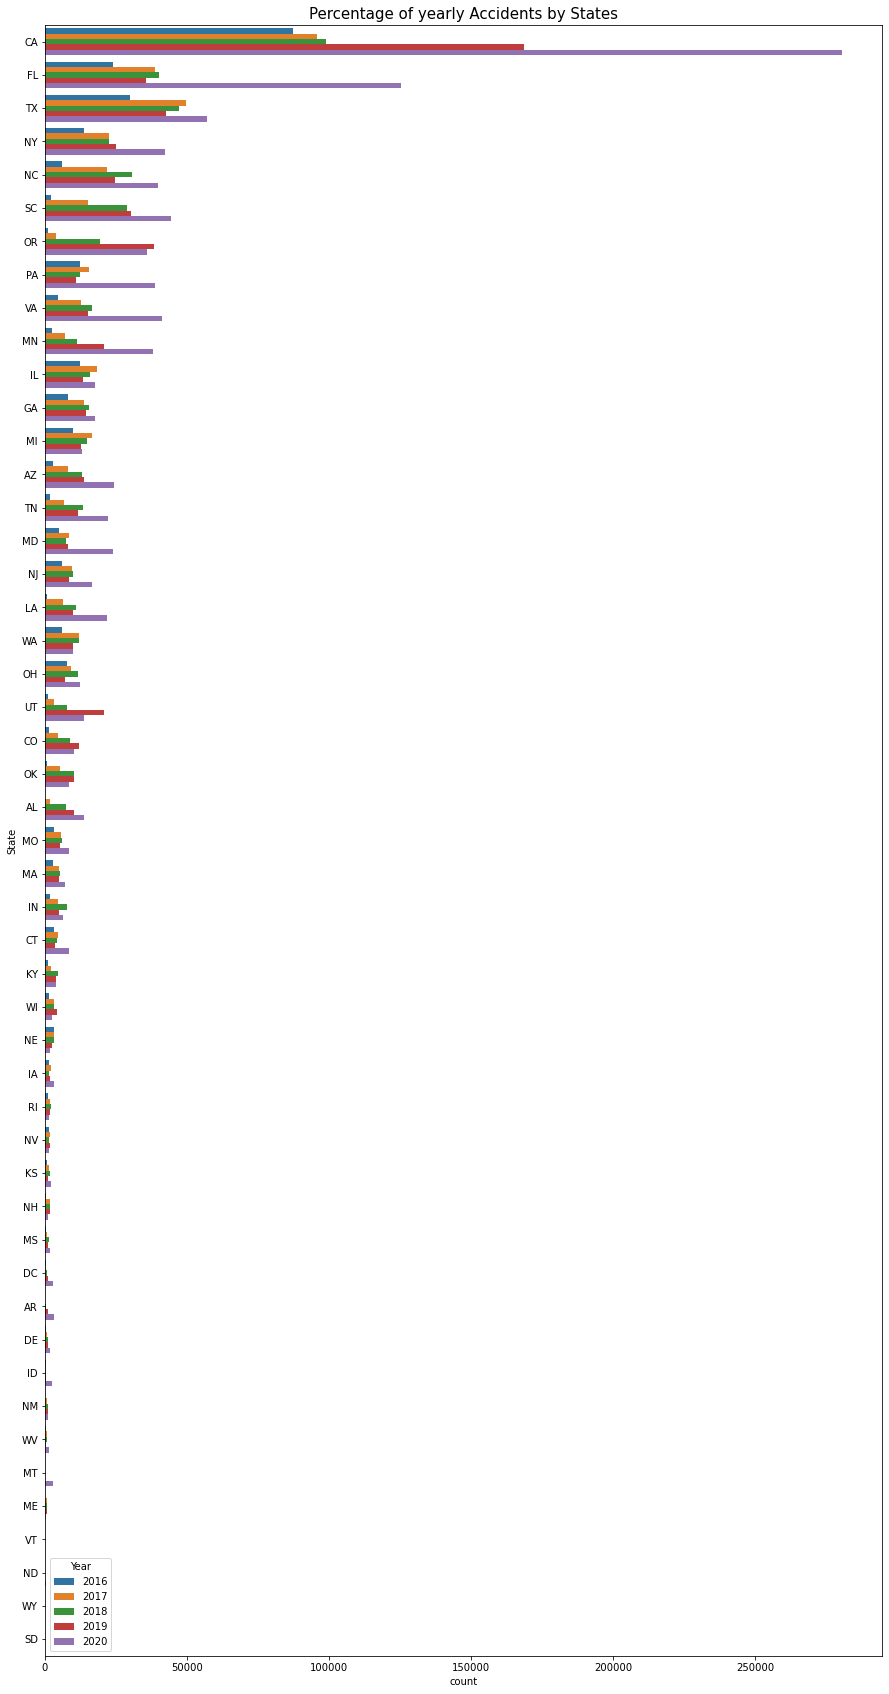

In [40]:
plt.figure(figsize = (15,30))
sns.countplot(y = "State", hue="Year", data=df_us, order = df_us["State"].value_counts().index)
plt.title("Percentage of yearly Accidents by States", fontsize = 15)

> 2020 have had most of the accidents for all the States. For Florida it seems the number has increased 3 times than the previous year. California also had 1.6 times increase over the previous year. PA, VA also had significant increase in 2020

## e/ Month

> ### Here I use attribute strftime that abbreviated month name or use attribute month_name

In [41]:
df_us["Month"] = df_us["Start_Time"].dt.strftime('%b')

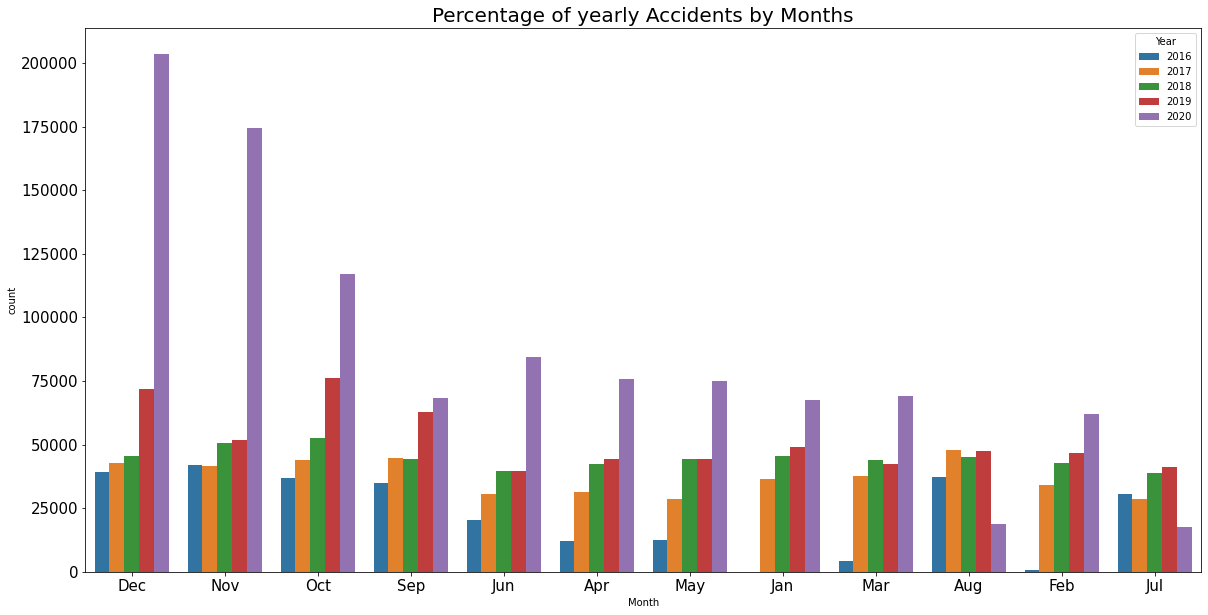

In [42]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Month", hue="Year", data=df_us, order = df_us["Month"].value_counts().index)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Percentage of yearly Accidents by Months", fontsize = 20)
plt.show()

> Most of the accidents happen during last quarter of the year with December having the most accidents. July registered least number of accidents.

> For December and November, 2020 had more accidents approx 3 times that of the previous year. For July and August, it seems the number has decreased by half. It's interesting to note that except 2020, all months had balanced number of accidents throughout all years

## f/ Day

In [43]:
df_us["Day_of_Week"] = df_us["Start_Time"].dt.day_name()

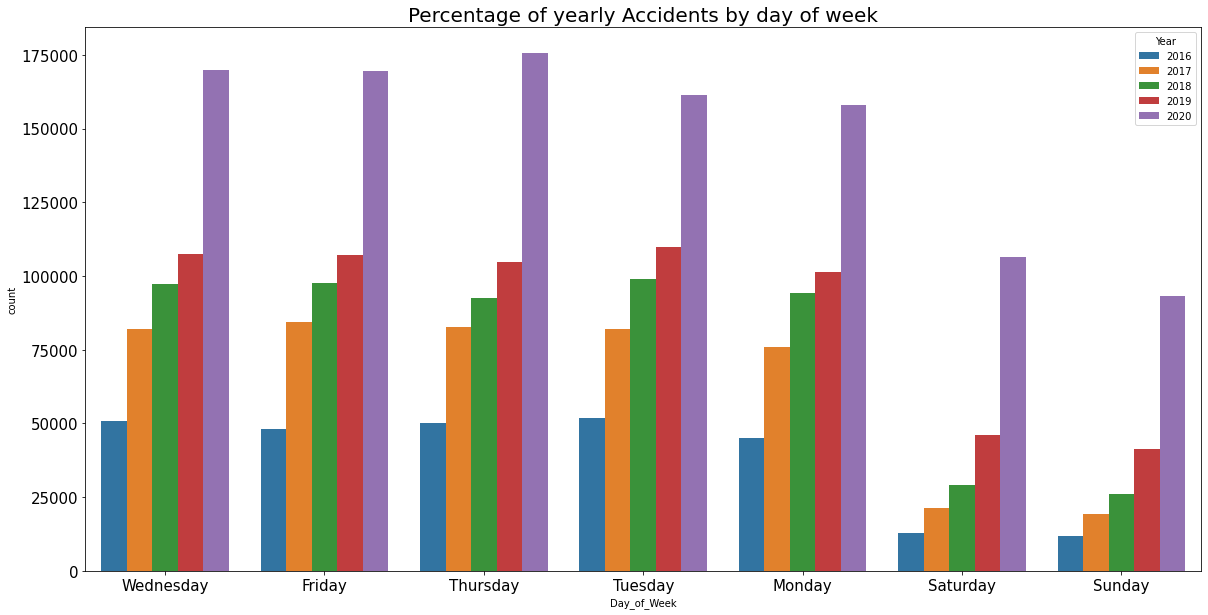

In [44]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Day_of_Week", hue="Year", data=df_us, order = df_us["Day_of_Week"].value_counts().index)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Percentage of yearly Accidents by day of week", fontsize = 20)
plt.show()

## g/ Hour

In [45]:
df_us["Hour"] = df_us["Start_Time"].dt.hour

Text(0.5, 1.0, 'Frequency of Accidents throughout the Hour')

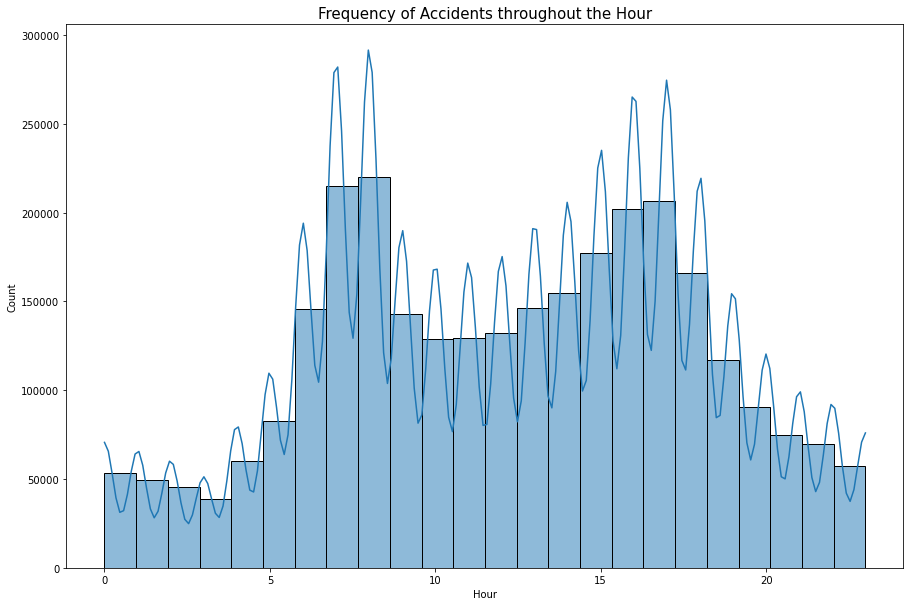

In [46]:
plt.figure(figsize = (15,10))
sns.histplot(data=df_us,x="Hour", kde=True,bins = 24)
plt.title("Frequency of Accidents throughout the Hour", fontsize = 15)

> Most accidents happen between 6AM-9AM and between 3PM-6PM. People commute to work and from work in those time gaps respectively. This might be the reason that Saturday and Sunday has least number of Accidents.

## h/ Severity

In [47]:
df_us["Severity"].value_counts()

2    2129263
3     629452
4     119144
1      28751
Name: Severity, dtype: int64

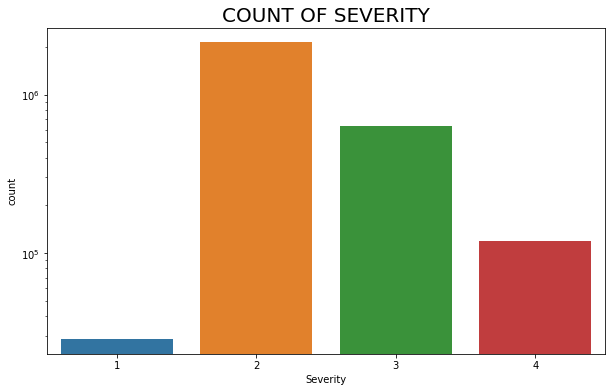

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x="Severity",data=df_us)
plt.yscale("log")
plt.title("COUNT OF SEVERITY",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Percentage of Severity of Accidents')

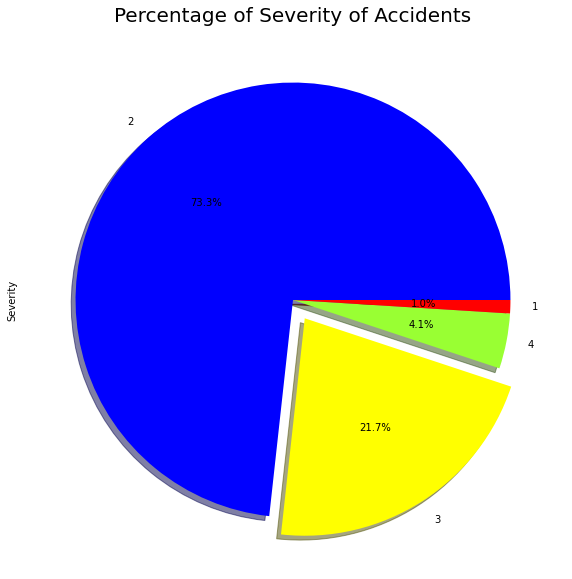

In [49]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0)
df_us["Severity"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", colors = ('#0000ff','#ffff00', '#99ff33', '#ff0000' ), explode = explode, shadow = True)
plt.title("Percentage of Severity of Accidents", fontsize = 20)

<AxesSubplot:xlabel='Severity', ylabel='count'>

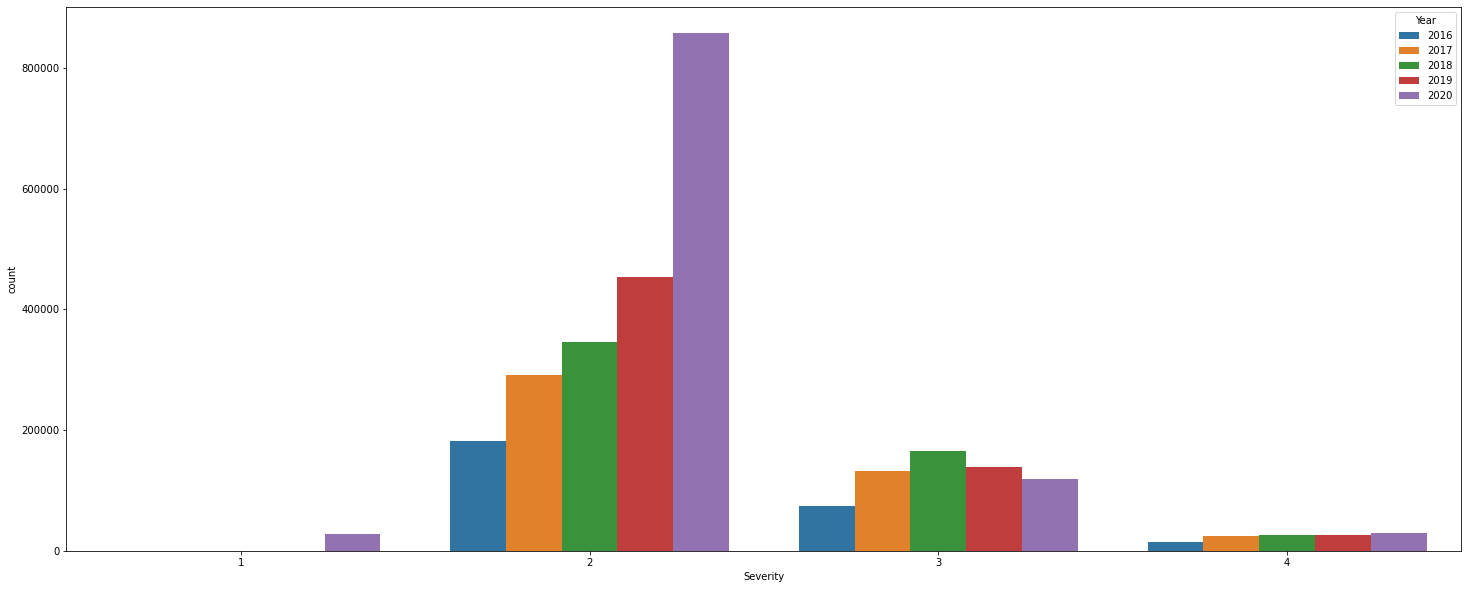

In [50]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Severity", hue = "Year", data = df_us)

> 73% reported accidents have Severity 2 which could mean that there are a lot of accidents which caused some injuries and had little impact

> It seems there are little to no records of Severity 1. Year 2020 had the most number of Severity 2 Accidents though it doesn't seem to be the case in Severity 3 and 4 which is an interesting find.

## k/ Weather

In [51]:
weather = df_us["Weather_Condition"].value_counts().reset_index()
weather.columns = ["Weather", "Number_of_Accidents"]
weather["% of_Accidents"] =(weather["Number_of_Accidents"]*100)/len(df_us)
weather.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
weather_condition = weather.head(30)
weather_condition.head(30)

,Weather,Number_of_Accidents,% of_Accidents
0,Fair,764531,26.303185
1,Clear,498925,17.165186
2,Mostly Cloudy,386122,13.284273
3,Partly Cloudy,268851,9.249641
4,Cloudy,245054,8.430921
5,Overcast,237068,8.156168
6,Light Rain,140946,4.849154
7,Scattered Clouds,127090,4.372448
8,Light Snow,39941,1.374144
9,Fog,33424,1.149931


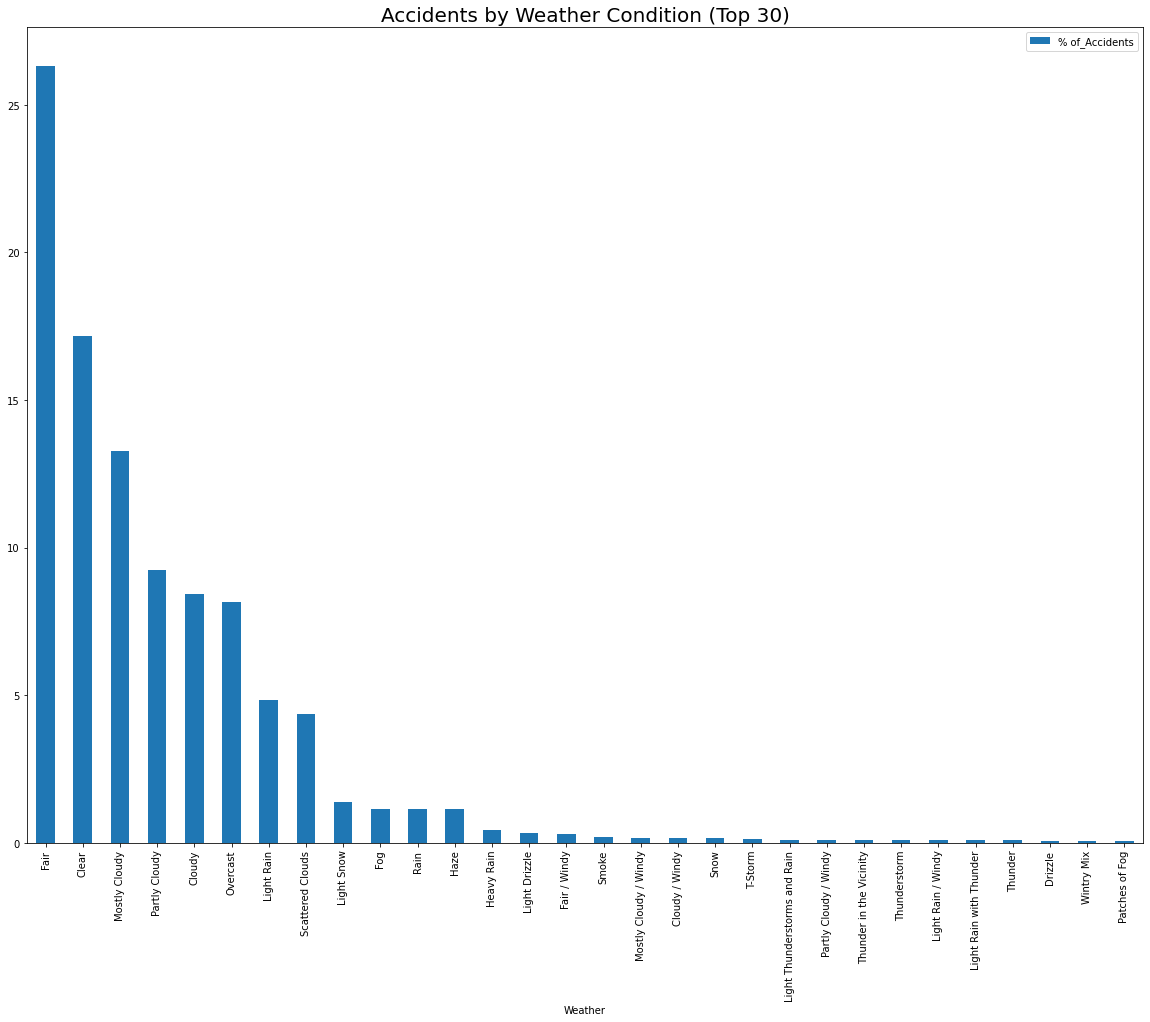

In [52]:
plt.rcParams["figure.figsize"] = (20,15)
weather_condition.plot(x = "Weather", y = "% of_Accidents", kind = "bar")
plt.title("Accidents by Weather Condition (Top 30)", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [53]:
print("top 5 weather condition:",weather_condition["% of_Accidents"].head(5).sum())
print("top 10 weather condition:",weather_condition["% of_Accidents"].head(10).sum())

top 5 weather condition: 74.43320569323026
top 10 weather condition: 94.33505010992185


In [54]:
group = df_us.groupby(["Weather_Condition", "Severity"])["Severity"].count().sort_values(ascending = False).unstack("Weather_Condition")

In [55]:
weather_severity = group[["Fair","Clear", "Mostly Cloudy", "Partly Cloudy", "Cloudy", "Overcast"]].unstack()

Text(0, 0.5, '')

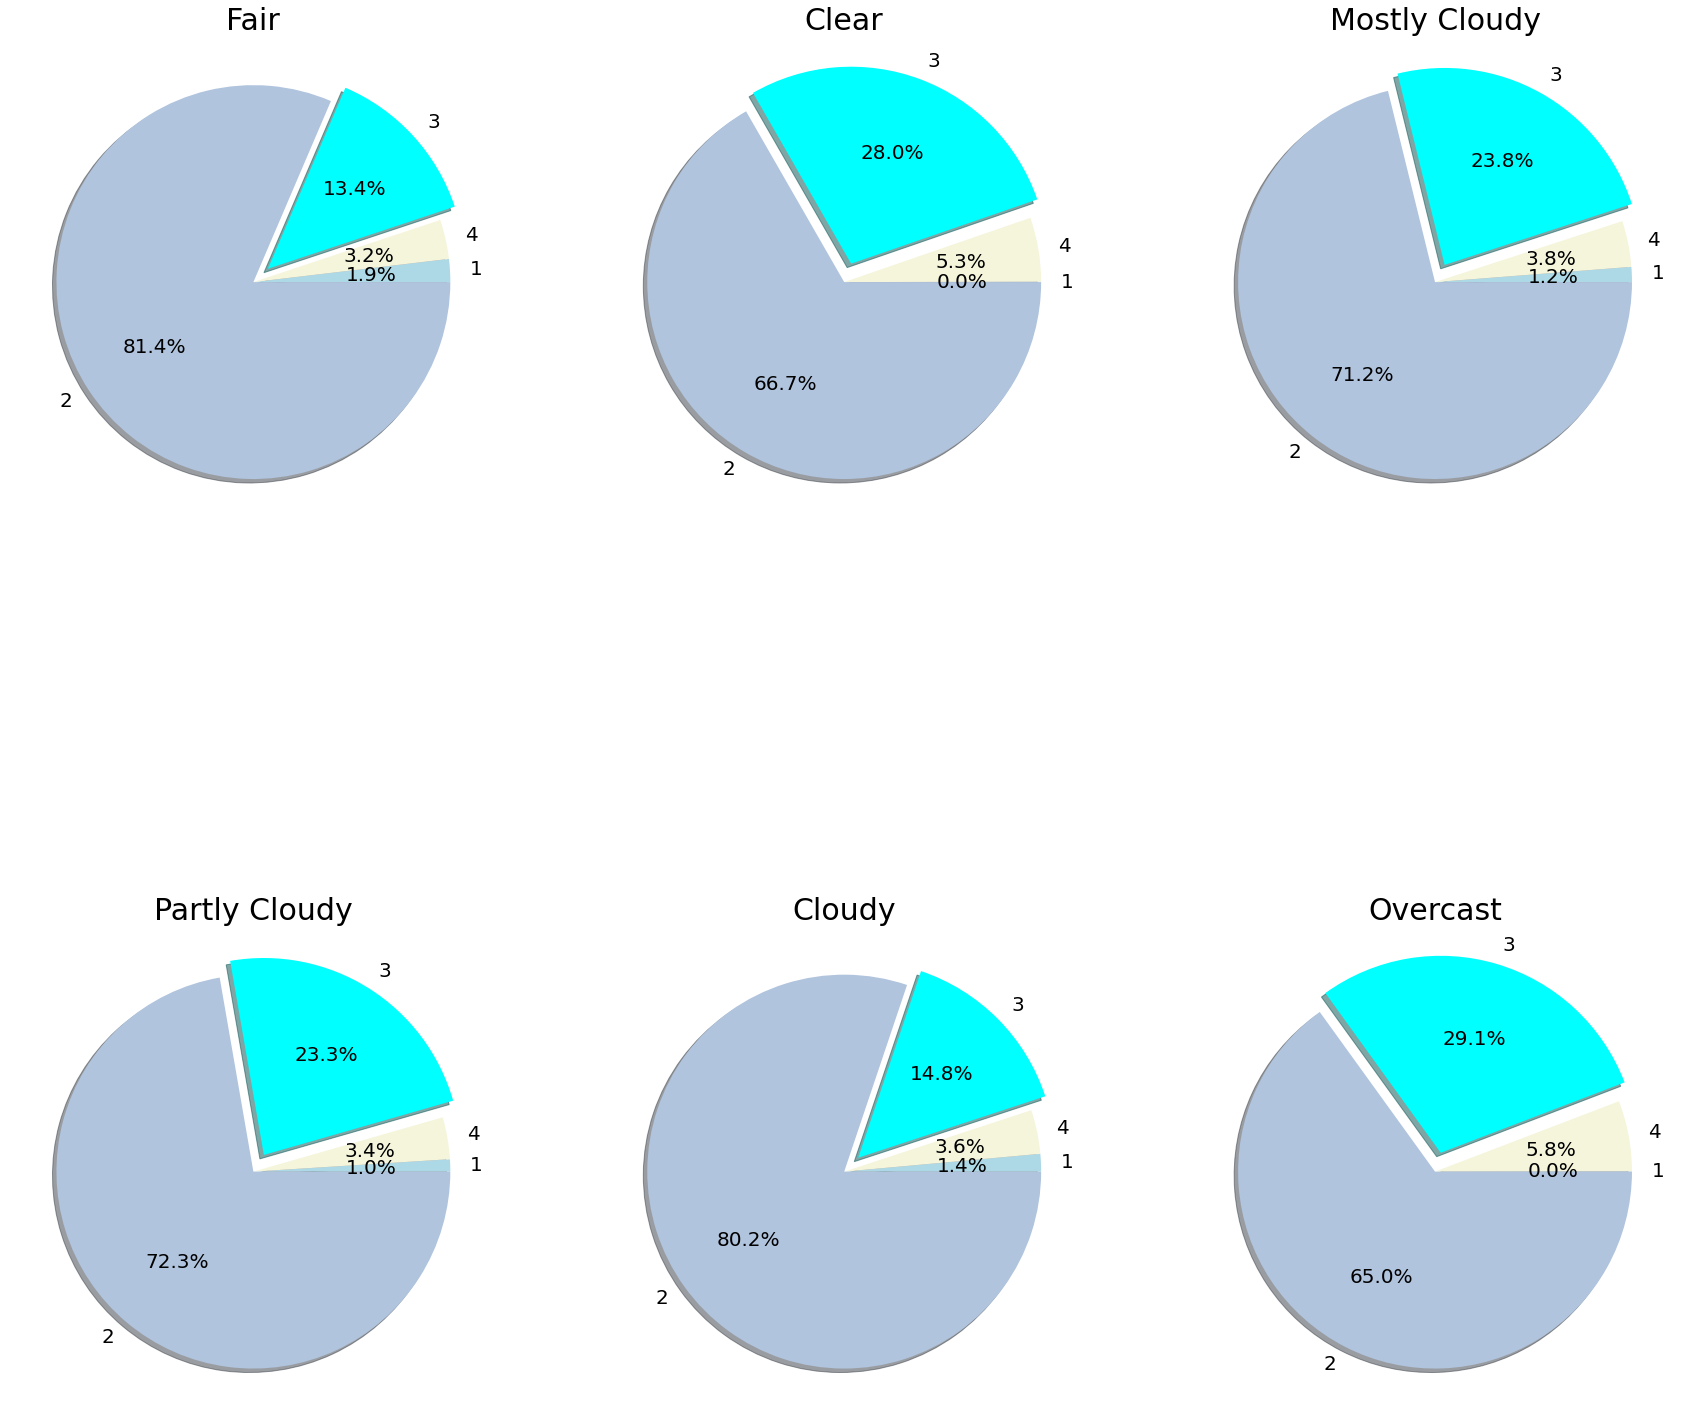

In [56]:
plt.figure(figsize = (30,30))
colors = ('lightblue', "beige", "cyan", 'lightsteelblue')
explode = (0, 0, 0.1, 0)
plt.subplot(2,3,1)
weather_severity.loc["Fair"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors =colors, explode = explode, shadow = True)
plt.title("Fair", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,2)
weather_severity.loc["Clear"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Clear", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,3)
weather_severity.loc["Mostly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Mostly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,4)
weather_severity.loc["Partly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Partly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,5)
weather_severity.loc["Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,6)
weather_severity.loc["Overcast"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Overcast", fontsize = 30)
plt.ylabel("")

> "Fair" weather condition has the large number of accidents i.e 26% of the accidents. Clear and Mostly Cloudy also have 17% and 13% respectively. Also for Partly Cloudy has 9%, Cloudy has 8%, Overcast has 8% accidents. These top 6 Weather conditions amounts to 82.6% of total accidents.

> It seems all six Weather has most accidents happened in Severity 2 i.e above 65%. Clear and Overcast Weather had no Severity 1 accidents.

## m/ Temperature

In [57]:
df_us["Temp Range"] = pd.cut(df_us["Temperature(F)"], [-100, -50, 0, 50,100, 150, 200, 250], labels = ["-100 - -50", "-50 - 0", "0 - 50", "50 - 100", "100 - 150", "150 - 200", "200 - 250"])

Text(0.5, 1.0, 'Percentage of Accidents in Temp Range')

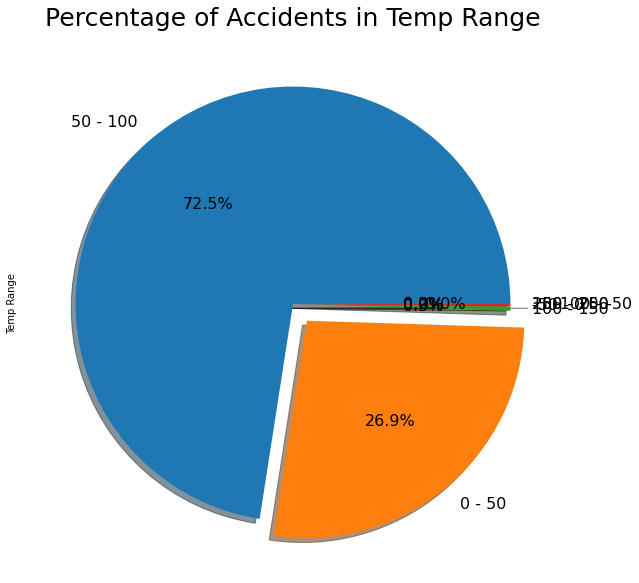

In [58]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0.1, 0, 0)
df_us["Temp Range"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 16}, explode = explode, shadow = True)
plt.title("Percentage of Accidents in Temp Range", fontsize = 25)

> 72.5% of accidents have happened in Temperature Range of 50-100 F and 26.9% of accidents have happened in 0 - 50 F Temp Range.


## n/ Visibility(mi)

In [59]:
group2 = df_us.groupby(["Temp Range", "Visibility(mi)"])["Temp Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Temp Range and Visibility (Top 30)')

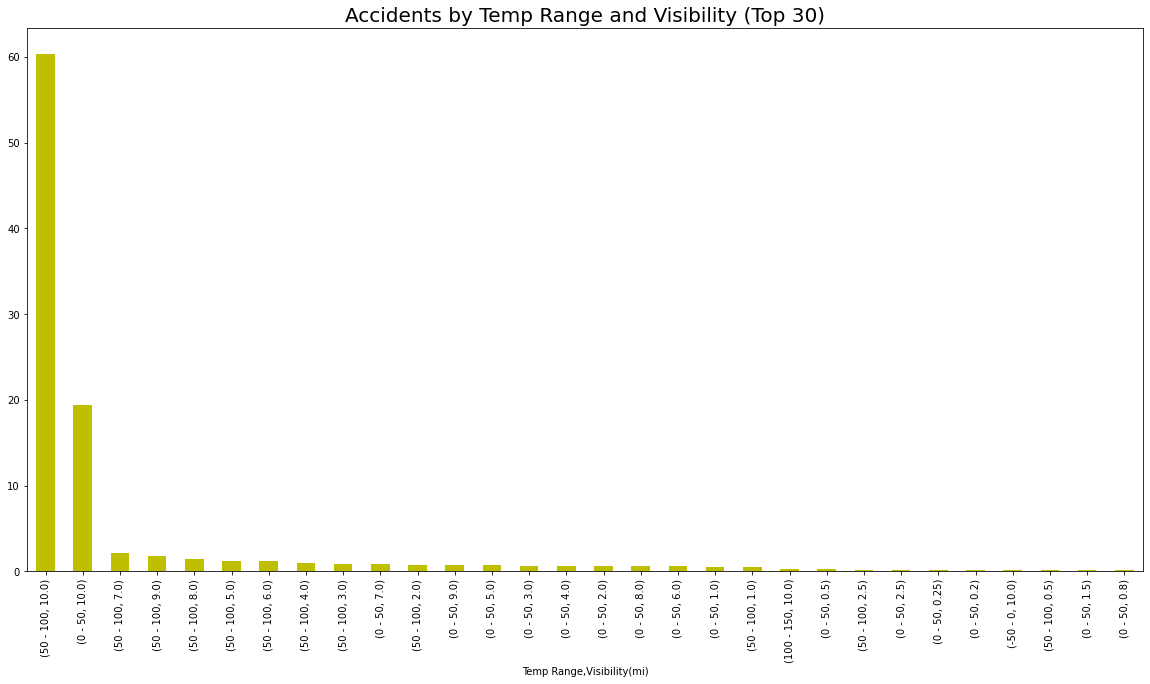

In [60]:
plt.figure(figsize = (20,10))
(group2*100/len(df_us)).plot(kind = "bar", color = "y")
plt.title("Accidents by Temp Range and Visibility (Top 30)", fontsize = 20)

Text(0.5, 1.0, 'Accidents by Visibility (Top 30)')

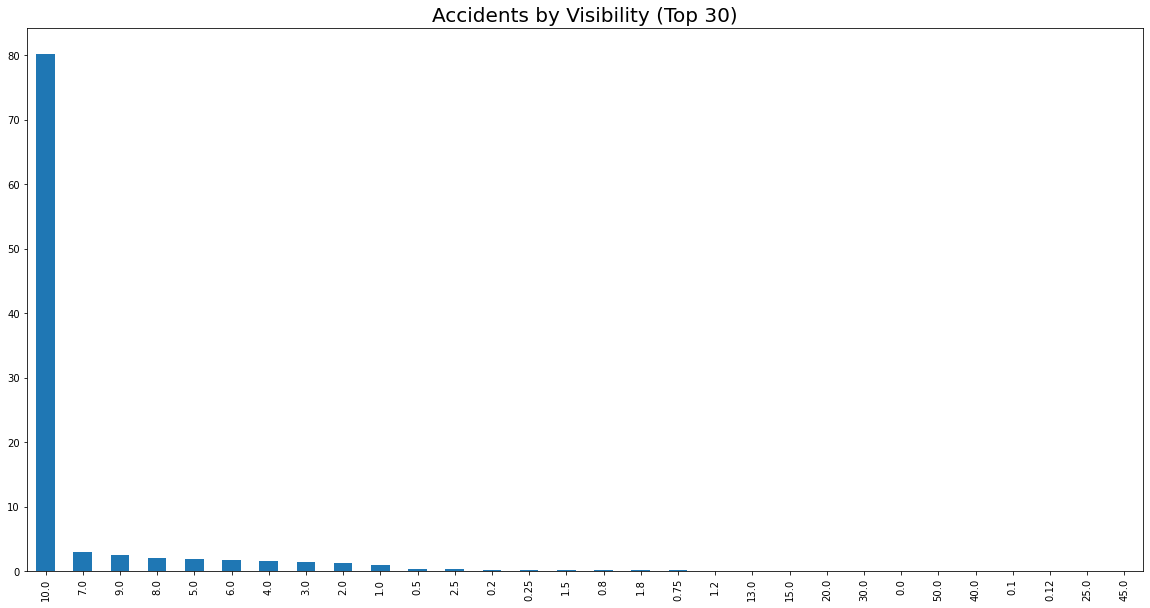

In [61]:
plt.figure(figsize = (20,10))
(df_us["Visibility(mi)"].value_counts().head(30)*100/len(df_us)).plot(kind = "bar")
plt.title("Accidents by Visibility (Top 30)", fontsize = 20)

> 80% of the accident records have 10.0 mi Visibility

## o/ Distance

In [62]:
df_us["Dist Range"] = pd.cut(df_us["Distance(mi)"], [-1,0,1,2,3,4,350], labels = [ "-1-0","0-1","1-2", "2-3", "3-4", "4+"])

Text(0.5, 1.0, 'Percentage of Accidents in Dist Range')

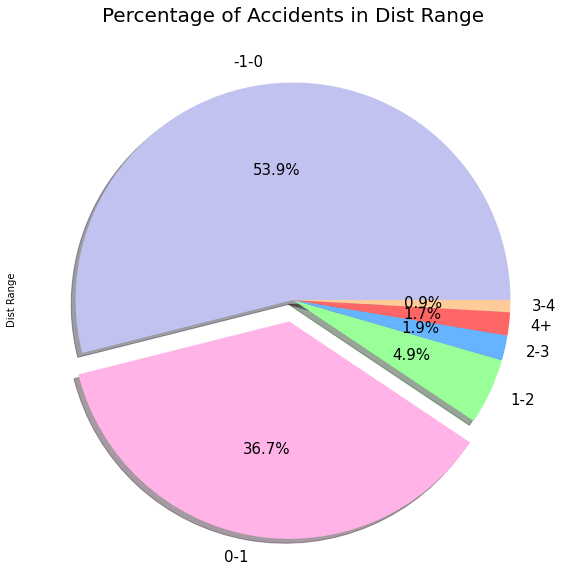

In [63]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0, 0)
df_us["Dist Range"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 15}, colors = ['#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff','#ff6666', '#ffcc99'], explode = explode, shadow = True)
plt.title("Percentage of Accidents in Dist Range", fontsize = 20)

In [64]:
group3 = df_us.groupby(["Dist Range", "Severity"])["Dist Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Dist Range and Severity (Top 30)')

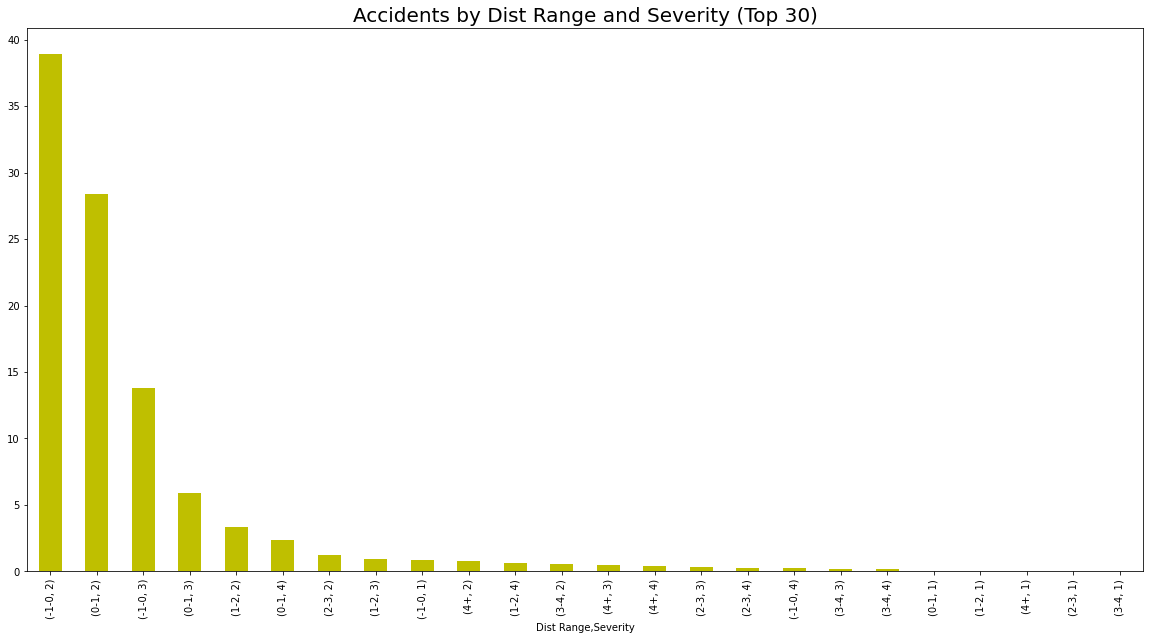

In [65]:
plt.figure(figsize = (20,10))
(group3*100/len(df_us)).plot(kind = "bar", color = "y")
plt.title("Accidents by Dist Range and Severity (Top 30)", fontsize = 20)

> 54% of the accidents happened on the spot. 37% of accidents have happened in 0 -1 mi Dist Range.

>39% of the accidents have happened on the spot with severity 2 accidents. 28% accidents have happened with 0 - 1 (mi) Dist Range with Severity 2 accidents.

## r/ Other Columns

In [66]:
new_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
new_df = pd.DataFrame(columns = ["Columns", "% of Accidents"])
new_df["Columns"] = new_columns
for i in range(len(new_df)):
    new_df["% of Accidents"].loc[i] = len(df_us[df_us[new_df["Columns"].loc[i]] == True])*100/len(df_us)

In [67]:
new_df.sort_values("% of Accidents", ascending = False, inplace = True)
new_df

,Columns,% of Accidents
11,Traffic_Signal,15.608
4,Junction,9.49825
2,Crossing,7.53211
8,Station,1.99236
9,Stop,1.56381
0,Amenity,1.07926
6,Railway,0.892001
3,Give_Way,0.282804
5,No_Exit,0.132732
10,Traffic_Calming,0.0449665


Text(0.5, 1.0, 'Accidents in presence of different factors')

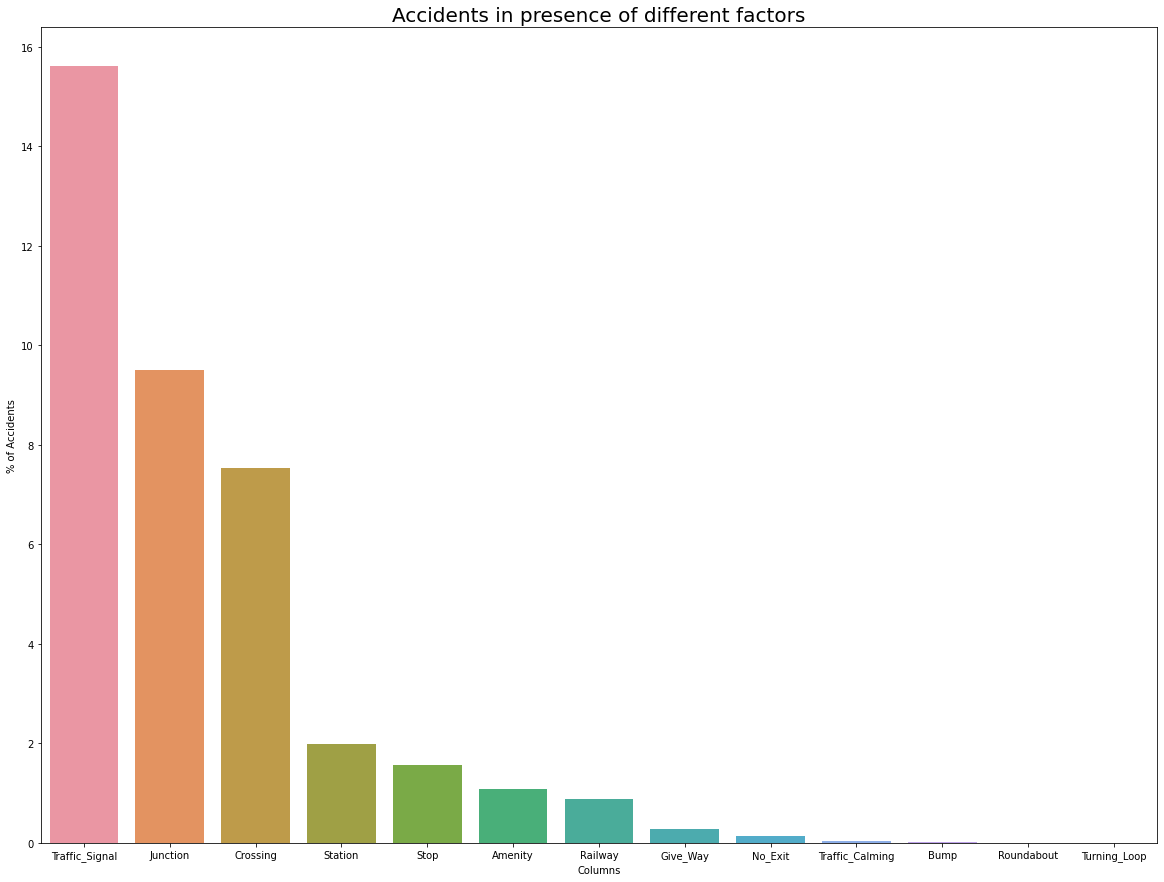

In [68]:
sns.barplot(x = "Columns", y = "% of Accidents", data = new_df)
plt.title("Accidents in presence of different factors", fontsize = 20)

> For 15% of Accidents Traffic Signal is nearby. 10% for Junction and 8% for Crossing.

In [69]:
ca_df = pd.DataFrame(columns = ["Columns", "% of Accidents"])
ca_df["Columns"] = new_columns
for i in range(len(ca_df)):
    mask1 = df_us[ca_df["Columns"].loc[i]] == True
    mask2 = df_us["State"]  == "CA"
    ca_df["% of Accidents"].loc[i] = len(df_us[mask1 & mask2])*100/len(df_us[df_us["State"] == "CA"])
    

In [70]:
ca_df.sort_values("% of Accidents", ascending = False, inplace = True)
ca_df

,Columns,% of Accidents
4,Junction,14.1423
11,Traffic_Signal,7.71583
2,Crossing,3.25244
9,Stop,2.07145
8,Station,1.89615
6,Railway,1.07124
0,Amenity,0.619779
3,Give_Way,0.0852556
5,No_Exit,0.0570651
10,Traffic_Calming,0.0318853


Text(0.5, 1.0, 'Accidents in California presence of different factors')

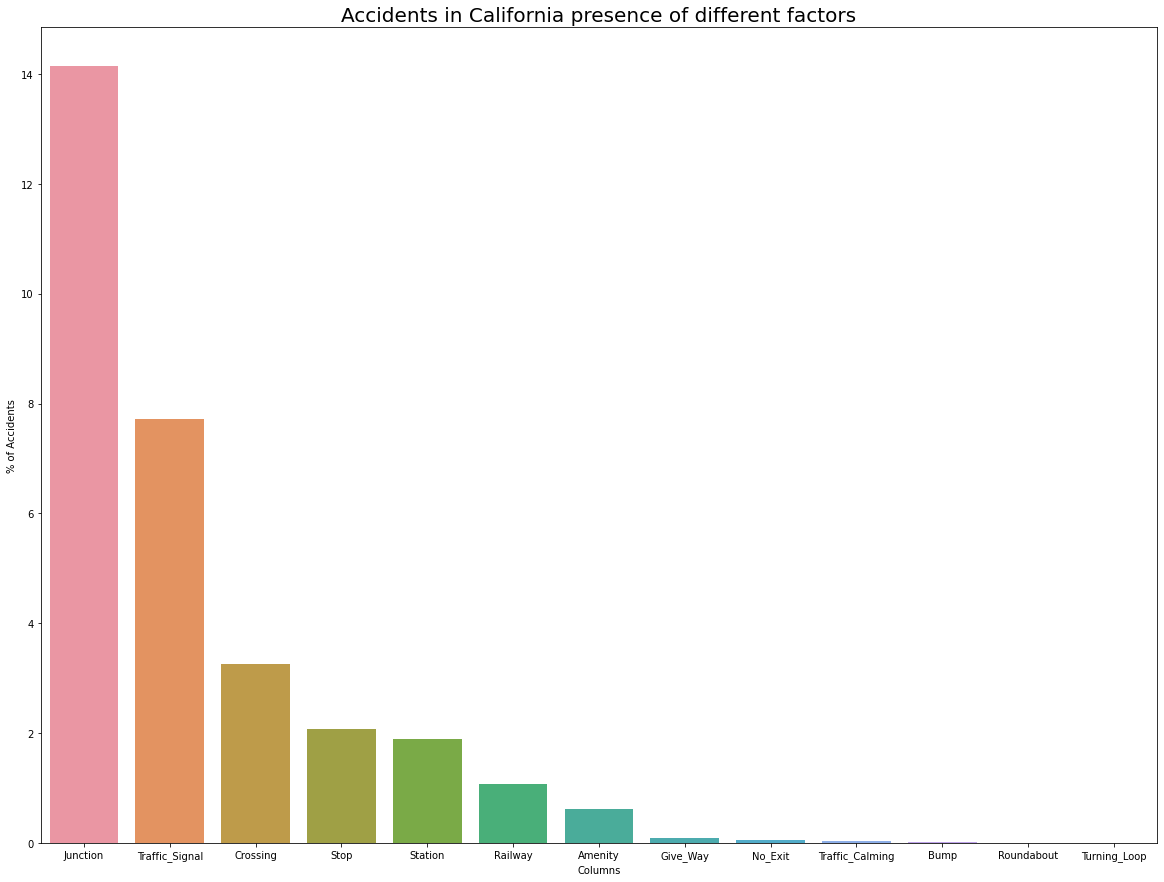

In [71]:
sns.barplot(x = "Columns", y = "% of Accidents", data = ca_df)
plt.title("Accidents in California presence of different factors", fontsize = 20)

> Junction could be one of the cause of Accidents in California which amounts for 14% of the total accidents in the State. And Traffic Signal with 8%

Text(0.5, 1.0, 'Accidents in Day/Night')

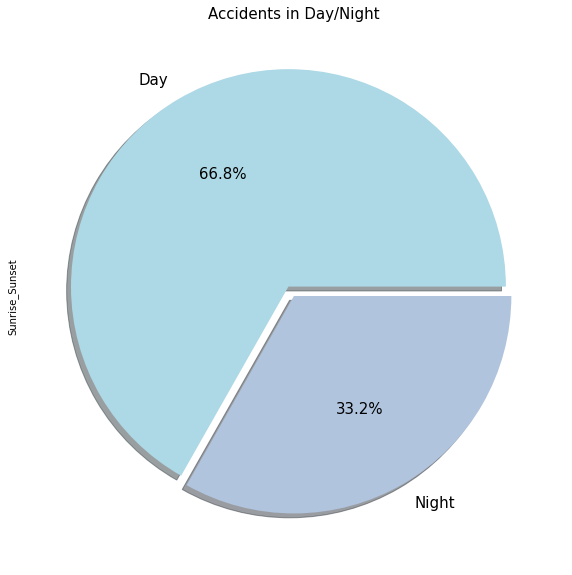

In [72]:
plt.figure(figsize = (25,10))
df_us["Sunrise_Sunset"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 15}, explode = (0.05,0), colors = ['lightblue','lightsteelblue'], shadow = True)
plt.title("Accidents in Day/Night", fontsize = 15)

> 2/3rd of accidents happen during the day